# Ricerca degli zeri di una funzione

Dato un intervallo **(a,b)** in cui la funzione **f** sia continua, la ricerca delle radici (zeri) sfrutta la proprieta' della funzione di cambiare segno dopo l'attraversamento di uno zero. Verificando quindi che il prodotto f(a)\*f(b) sia negativo o positivo si potra' dire se la funzione, entro l'intervallo dato, avra' o meno uno zero.  
> **Attenzione:**  se l'intervallo (a,b) entro cui cerchiamo lo zero fosse tanto grande da contenere due zeri della funzione, avremmo che f(a)\*f(b) sarebbe positivo e rischieremmo di "non vedere" gli zeri nell'intervallo (a,b). Per     evitare questa situazione e' consigliabile dare sempre uno sguardo preliminare all'andamento della funzione per  scegliere opportunamente le dimensioni dell'intervallo di ricerca.

Nel seguito ci eserciteremo ad implementare due algoritmi per trovare gli zeri di una funzione:

## Metodo della bisezione:


In [1]:
# Adattato da:  Numerical Methods in Engineering with Python by Jaan Kiusalaas:
import numpy as np 

def rootsearch(f,a,b,dx):
    ## modulo rootsearch: usando un passo dx verifica 
    ## se nell'intervallo (a,b) la funzione cambia segno 
    """ Cerca nell'intervallo (a,b) con passo dx la regione 
        che contiene i limiti (x1,x2) all'interno dei quali 
        si trova la prima radice di f(x). Se NON trova radici 
        esce con x1 = x2 = None 

        USE :  x1,x2 = rootsearch(f,a,b,dx).
        OUT :   x1, x2 sono due punti al cui interno c'e' 
                    il primo cambiamento di segno della f  
                    muovendosi da a --> verso b.
    """
    from numpy import sign
    # vado ad esplorare la funzione a partire dal punto iniziale
    x1 = a; f1 = f(a)         # valuto la f nel punto iniziale 
    x2 = a + dx; f2 = f(x2)   # valuto la f a distanza dx successiva 
    while f1*f2 > 0.0:        # se vero => non attraversa lo zero
        if x1 >= b:           # se x1>b esce senza  aver trovato uno zero 
            return None,None  
        x1 = x2; f1 = f2      # aggiorno le posizioni per cercare ancora 
        x2 = x1 + dx; f2 = f(x2)
    return x1,x2              # esco appena f1*f2 < 0 avendo fatto "fork"

def bisect(f,x1,x2,switch=0,epsilon=1.0e-9):
    """ Ispeziona l'intervallo [x1,x2] contenente uno zero
        (gia' individuato grossolanamente da "rootsearch") 
        e lo suddivide per avvicinarsi allo zero con la 
        accuratezza richiesta da "epsilon".
        
    """
    f1 = f(x1)
    if f1 == 0.0:   # se f(x1)=0 allora e' una radice
        return x1
    f2 = f(x2)
    if f2 == 0.0:   # se f(x2)=0 allora e' una radice
        return x2
    if f1*f2 > 0.0: # se f1 ed f2 concordi => non attraversa lo zero 
        print('nessuno zero tra {} ed {} '.format(x1,x2))
        return None
    
    # se f1*f2 e' negativo allora c'e' uno zero tra x1 ed x2 !
    # procedo alla bisezione dell'intervallo sapendo che il 
    # numero di bisezioni necessarie per raggiungere l'accuratezza 
    # richiesta epsilon e' dato da (vedi eq.(1.36) degli appunti):
    n = int(np.ceil(np.log(abs(x2 - x1)/epsilon) )) #/np.log(2.0)))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)   # punto di mezzo dell'intervallo
        if (switch == 1) and (abs(f3) >abs(f1)) and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0:
            return x3
        if f2*f3 < 0.0:  # scegli il semiintervallo in cui la f cambia segno
            x1 = x3
            f1 = f3
        else:
            x2 =x3
            f2 = f3
    return (x1 + x2)/2.0

def roots(f, a, b, eps=1e-6):
#    print ('The roots on the interval [%f, %f] are:' % (a,b))
    print ('The roots on the interval {}, {} are: '.format(a,b))
    while 1:
        x1,x2 = rootsearch(f,a,b,eps)
        if x1 != None:
            a = x2
            root = bisect(f,x1,x2,1)
            if root != None:
                pass
                print (round(root,-int(np.log10(eps))))
        else:
            print ('\n Done')
            break


def f(x):
    """ Definizione della funzione """
    return x*np.cos(x-4)

linf=-6
lsup=+6
roots(f, linf, lsup)


The roots on the interval -6, 6 are: 
-3.853982
-0.712389
-0.0
2.429204
5.570796

 Done


*** 
### Grafico della funzione 
Per valutare "ad occhio" se i risultati ottenuti per le posizioni degli zeri sono congruenti con la nostra nostra funzione, procediamo a farne un grafico nell'intervallo che ci interessa:

<function matplotlib.pyplot.show>

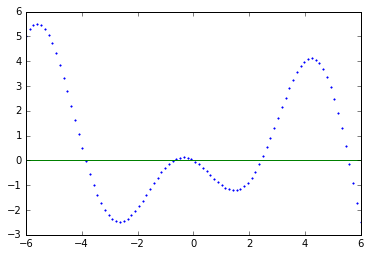

In [3]:
# procedo al plot della funzione nell'intervallo investigato 
# per verificare ad occhio la posizione degli zeri trovati:
npunti=90
xxx=np.linspace(linf,lsup,num=npunti)
#for i in xxx : xxx = float(xxx)

plt.plot(xxx,f(xxx),'.',markersize=3)
plt.plot(xxx,np.zeros(npunti))
#plt.ylim([linf,lsup])
plt.show


## Metodo di Newton-Raphson: 

In questa parte del notebook andiamo a cercare gli zeri della stessa funzione con un diverso approccio. Si tratta di usare la formula ricavata a lezione (eq.(1.38) degli appunti) e di adottare un punto di partenza tale che l'agoritmo possa convergere allo zero cercato. Ricordiamo in particolare che la scelta del punto di partenza e' importante perche' se non viene fatta con attenzione puo' portare a soluzioni che nulla hanno a che fare con lo zero cercato oppure a "loop" infiniti, o anche a divergere. 

In [23]:
# Il polinomio che si vuole indagare e': f=6*x**5-5*x**4-4*x**3+3*x**2
# Vogliamo trovare la $x$ per cui $f(x)=0$ con una precisione arbitraria  
# ATTENZIONE: il risultato della ricerca di uno zero per una funzione 
#             dipende dalla scelta del punto da cui iniziare la ricerca. 
# In questo esemmpio partiamo da x_0 e cerchiamo di individuare 
# tutte le possibili radici (o zeri) della funzione indagata

def f(x):
    """ definizione della funzione """
    # return 6*x**5-5*x**4-4*x**3+3*x**2  # prima funzione
    return x*np.cos(x-4)    # funzione alternativa 

def df(x):
    # derivata della f(x)
    # return 30*x**4-20*x**3-12*x**2+6*x   # derivata prima funzione
    return np.cos(x-4)-x*np.sin(x-4)  # derivata della funzione alternativa
    
def dx(f, x):
    # calcola la distanza tra lo zero e la funzione nel punto x 
    # Usiamo questa definizione per motivi didattici, visto che 
    # sarebbe possibile calcolare la stessa differenza nel 
    # programma chiamante 
    return abs(0-f(x))

def newtons_method(f, df, x0, eps=1e-6):
    """ x0    punto da cui far partire l'algoritmo di Newton-Raphson 
              che tende all'avvicinamento allo zero della funzione
        NOTA: se X0 non viene scelto opportunamente in vicinanza 
              dello zero cercato (nel "bacino di attrazione") la 
              procedura potrebbe divergere o anche convergere, 
              ma non allo zero che ci aspettiamo di trovare.

        eps   accuratezza richiesta 
    """
    delta = dx(f, x0)
    while delta > eps:
        x0 = x0 - f(x0)/df(x0) # questa e' l'eq(1.38) degli appunti
        delta = dx(f, x0)      # valuto la distanza dallo zero
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))

*** 
### Grafico della funzione usata in Newton-Raphson
Per scegliere i punti di partenza dell'algoritmo realizziamo un grafico della nostra funzione per fare una stima approssimativa delle posizioni degli zeri:

<function matplotlib.pyplot.show>

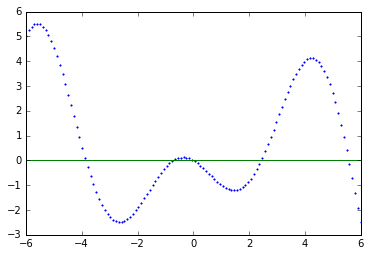

In [24]:
# produco un grafico della funzione:
npunti=120    # numero di punti da usare nel grafico 
# array con valori da 0 a npunti-1   
linf=-6
lsup=+6
aaa=np.linspace(linf,lsup,num=npunti)
#aaa=np.array([i for i in range(npunti)]) 
#aaa=(aaa/(npunti))
#bbb=np.concatenate([-aaa,aaa])
bbb=aaa
plt.plot(bbb,f(bbb),'.',markersize=3)
plt.plot(bbb,np.zeros(npunti))
#plt.ylim([-1,+1])
plt.show

In [26]:
# Aiutandoci con il grafico della funzione scegliamo, per ogni zero 
# a cui siamo interessati, quei valori di partenza per la x tali da 
# poter convergere poi allo zero corrispondente. La regione entro cui 
# la x scelta porta a convergere sempre allo stesso zero si chiama 
# "bacino di attrazione" dello zero.

#x0s = [-0.7, 0.1, .5, .9]    # scelta per la prima funzione
x0s = [-4.5, -1, 1, 2.5,5]

# e applichiamo il metodo di Newton a partire dai tre punti dati
for x0 in x0s:
    newtons_method(f, df, x0, eps=1e-5)

Root is at:  -3.85398165263
f(x) at root is:  7.19039858933e-08
Root is at:  -0.712388981204
f(x) at root is:  -5.83803288629e-10
Root is at:  3.02761737068e-10
f(x) at root is:  -1.97898278145e-10
Root is at:  2.42920505906
f(x) at root is:  3.36652046598e-06
Root is at:  5.5707963268
f(x) at root is:  -3.36915228123e-12
